# TP ANALISIS DE DATOS. Cohorte 6 2022

### Miembros del equipo: 
#### Marcelo Chichiri, Pablo Gámez, Mariano Hunkeler


1. Introducción y motivación
Les proponemos para este trabajo final realizar el análisis completo para un set de datos, para ello les vamos a proponer varios de estos y la idea es que ustedes elijan uno.
Para dar un poco de noción sobre a qué corresponden estos datos, también vamos a presentar a que tipo de problema/etapa del análisis de datos corresponden.

2. Análisis exploratorio inicial \
• Visualizar las primeras filas. \
• Realizar un resumen de 5 números. \
• Identificar los tipos de datos: categórico, ordinal, etc. \
Responder para cada variable su tipo y si es informativa para un problema de clasificación (por ejemplo si se trata de un código, como una matrícula, o un nombre propio). \
• Identificar las variables de entrada y de salida del problema. \
• Variables de entrada: \
     o Realizar los siguientes análisis por tipo de variable: 
        • Numéricas: Obtener conclusiones acerca de la distribución de los datos. 
        • Categóricas: Obtener conclusiones acerca de la cardinalidad, representación de cada categoría, etc. 
        • Compuestas: ¿Pueden tratarse para utilizarse en el problema a resolver? 
• Variables de salida (en caso de aplicar): \
    o ¿Están balanceadas las clases? \
    o (en caso de aplicar) ¿Qué técnicas consideraría para codificar la variable de salida? Justifique.
    




### Descripción del Dataset 
Dataset : Datos de distintas estaciones meteorológicas de Australia.

#### Pregunta a responder: ¿Lloverá mañana? (variable RainTomorrow), en función datos meteorológicos del día actual.

Variables de entrada \
================= \
Date : The date of observation \
Location : The common name of the location of the weather station \
MinTemp	: The minimum temperature in degrees celsius \
MaxTemp	: The maximum temperature in degrees celsius \
Rainfall : The amount of rainfall recorded for the day in mm \
Evaporation	: The so-called Class A pan evaporation (mm) in the 24 hours to 9am \
Sunshine : The number of hours of bright sunshine in the day. \
WindGustDir	: The direction of the strongest wind gust in the 24 hours to midnight \
WindGustSpeed : The speed (km/h) of the strongest wind gust in the 24 hours to midnight \
WindDir9am : Direction of the wind at 9am \
WindDir3pm : Direction of the wind at 3pm \
WindSpeed9am : Wind speed (km/hr) averaged over 10 minutes prior to 9am \
WindSpeed3pm : Wind speed (km/hr) averaged over 10 minutes prior to 3pm \
Humidity9am	: Humidity (percent) at 9am \
Humidity3pm	: Humidity (percent) at 3pm \
Pressure9am	: Atmospheric pressure (hpa) reduced to mean sea level at 9am \
Pressure3pm	: Atmospheric pressure (hpa) reduced to mean sea level at 3pm \
Cloud9am : Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast. \
Cloud3pm : Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values \
Temp9am	: Temperature (degrees C) at 9am \
Temp3pm	: Temperature (degrees C) at 3pm \
RainToday : Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0 

Variable de salida \
================= \
RainTomorrow : The amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of measure of the "risk"


## Análisis / Comentarios
Deben considerarse las siguientes situaciones
- Se ven algunos features con muchos valores NaN :
        Cloud9am         38.42
        Cloud3pm         40.81
        Evaporation      43.17
        Sunshine         48.01
        
- Los datos de salidas (dias que lloverá) no están balanceados:
        Dias que lloverá : 
        No     110316
        Yes     31877
        
- Hay 3267 filas que tienen NaN en el feature de salida (RainTomorrow), esto corresponde a 2.25% de las filas 
Solo las siguinetes filas pueden de RainTomorrow pueden ser reemplazadas por RainToday del día siguiente : 99512
102552
105561
108570
139110
142303
143881


- Se ven algunos features con una correlación significativa : \
    Features con correlación mayor a 0.8 : \
    MinTemp <--> Temp9am : 0.902 \
    MaxTemp <--> Temp9am : 0.887 \
    MaxTemp <--> Temp3pm : 0.985 \
    Pressure9am <--> Pressure3pm : 0.961 \
    Temp9am <--> Temp3pm : 0.861

        

In [1]:
# Importa librerias
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Definición de función para presentar histogramas

def display_dataset_distributions(dataset):
    fig = dataset.hist(xlabelsize=12, ylabelsize=12,figsize=(22,10))
    [x.title.set_size(14) for x in fig.ravel()]
    plt.tight_layout()
    plt.show()

In [3]:
# Apertura de archivo
dataCruda = pd.read_csv('C:/ESPECIALIZACION_EN_INTELIGENCIA_ARTIFICIAL/04-ANALISIS DE DATOS/TP Final/weatherAUS.csv', delimiter=',')

In [4]:
# Se convierte el campo Date a fecha
dataCruda['Date'] = pd.to_datetime(dataCruda['Date'], format="%Y-%m-%d")

In [5]:
# Se ordena por Locación y por fecha
data = dataCruda.sort_values(['Location','Date'],ascending=True)

In [6]:
# Análisis
print(f'El dataset tiene {data.shape[0]} filas y {data.shape[1]} columnas')

El dataset tiene 145460 filas y 23 columnas


In [7]:
number = 'number'
print(f'Features categoricas : {len(list(data.select_dtypes(exclude = number).columns))}')
print(f'Features numericas : {len(list(data.select_dtypes(include = number).columns))}')

Features categoricas : 7
Features numericas : 16


In [8]:
print(f'Features categoricas : {list(data.select_dtypes(exclude = number).columns)}\n')

print(f'Features numericas : {list(data.select_dtypes(include = number).columns)}')

Features categoricas : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

Features numericas : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [9]:
print('Encabezados \n')
data.head(50).transpose()

Encabezados 



96320                96321                96322  \
Date           2008-07-01 00:00:00  2008-07-02 00:00:00  2008-07-03 00:00:00   
Location                  Adelaide             Adelaide             Adelaide   
MinTemp                        8.8                 12.7                  6.2   
MaxTemp                       15.7                 15.8                 15.1   
Rainfall                       5.0                  0.8                  0.0   
Evaporation                    1.6                  1.4                  1.8   
Sunshine                       2.6                  7.8                  2.1   
WindGustDir                     NW                   SW                    W   
WindGustSpeed                 48.0                 35.0                 20.0   
WindDir9am                      SW                  SSW                  NNE   
WindDir3pm                       W                   SW                   SW   
WindSpeed9am                  13.0                 13.0                  2.0   
WindSpeed3pm                  15.0                 15.0                 11.0   
Humidity9am                   92.0                 75.0                 81.0   
Humidity3pm                   67.0                 52.0                 56.0   
Pressure9am                 1017.4               1022.4               1027.8   
Pressure3pm                 1017.7               1022.6               1026.5   
Cloud9am                       NaN                  NaN                  NaN   
Cloud3pm                       NaN                  NaN                  NaN   
Temp9am                       13.5                 13.7                  9.3   
Temp3pm                       14.9                 15.5                 13.9   
RainToday                      Yes                   No                   No   
RainTomorrow                    No                   No                   No   

                             96323                96324                96325  \
Date           2008-07-04 00:00:00  2008-07-05 00:00:00  2008-07-06 00:00:00   
Location                  Adelaide             Adelaide             Adelaide   
MinTemp                        5.3                  9.8                 11.3   
MaxTemp                       15.9                 15.4                 15.7   
Rainfall                       0.0                  0.0                  NaN   
Evaporation                    1.4                  NaN                  NaN   
Sunshine                       8.0                  0.9                  1.5   
WindGustDir                    NNE                    N                  NNW   
WindGustSpeed                 30.0                 30.0                 52.0   
WindDir9am                     NNE                  NNE                  NNE   
WindDir3pm                      NE                   NE                  NNW   
WindSpeed9am                   6.0                  9.0                 15.0   
WindSpeed3pm                  13.0                  9.0                 22.0   
Humidity9am                   71.0                 56.0                 62.0   
Humidity3pm                   46.0                 67.0                 62.0   
Pressure9am                 1028.7               1023.6               1019.5   
Pressure3pm                 1025.6               1020.2               1016.2   
Cloud9am                       NaN                  NaN                  NaN   
Cloud3pm                       NaN                  NaN                  NaN   
Temp9am                       10.2                 11.3                 13.0   
Temp3pm                       15.3                 13.8                 14.4   
RainToday                       No                   No                  NaN   
RainTomorrow                    No                  NaN                  Yes   

                             96326                96327                96328  \
Date           2008-07-07 00:00:00  2008-07-08 00:00:00  2008-07-09 00:00:00   
Location                  A

In [10]:
data.describe().transpose()

count         mean        std    min     25%     50%  \
MinTemp        143975.0    12.194034   6.398495   -8.5     7.6    12.0   
MaxTemp        144199.0    23.221348   7.119049   -4.8    17.9    22.6   
Rainfall       142199.0     2.360918   8.478060    0.0     0.0     0.0   
Evaporation     82670.0     5.468232   4.193704    0.0     2.6     4.8   
Sunshine        75625.0     7.611178   3.785483    0.0     4.8     8.4   
WindGustSpeed  135197.0    40.035230  13.607062    6.0    31.0    39.0   
WindSpeed9am   143693.0    14.043426   8.915375    0.0     7.0    13.0   
WindSpeed3pm   142398.0    18.662657   8.809800    0.0    13.0    19.0   
Humidity9am    142806.0    68.880831  19.029164    0.0    57.0    70.0   
Humidity3pm    140953.0    51.539116  20.795902    0.0    37.0    52.0   
Pressure9am    130395.0  1017.649940   7.106530  980.5  1012.9  1017.6   
Pressure3pm    130432.0  1015.255889   7.037414  977.1  1010.4  1015.2   
Cloud9am        89572.0     4.447461   2.887159    0.0     1.0     5.0   
Cloud3pm        86102.0     4.509930   2.720357    0.0     2.0     5.0   
Temp9am        143693.0    16.990631   6.488753   -7.2    12.3    16.7   
Temp3pm        141851.0    21.683390   6.936650   -5.4    16.6    21.1   

                  75%     max  
MinTemp          16.9    33.9  
MaxTemp          28.2    48.1  
Rainfall          0.8   371.0  
Evaporation       7.4   145.0  
Sunshine         10.6    14.5  
WindGustSpeed    48.0   135.0  
WindSpeed9am     19.0   130.0  
WindSpeed3pm     24.0    87.0  
Humidity9am      83.0   100.0  
Humidity3pm      66.0   100.0  
Pressure9am    1022.4  1041.0  
Pressure3pm    1020.0  1039.6  
Cloud9am          7.0     9.0  
Cloud3pm          7.0     9.0  
Temp9am          21.6    40.2  
Temp3pm          26.4    46.7

In [11]:
print('Informacion de cada feature :\n')
data.info()

Informacion de cada feature :

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145460 entries, 96320 to 108570
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    14

In [12]:
print(f'De las {data.shape[1]} columnas hay {len(list(data.columns[data.isnull().any()]))} con valores nulos\n')
if len(list(data.columns[data.isnull().any()]))>0:
    print(f'Los siguientes features tienen valores nulos : \n{list(data.columns[data.isnull().any()])}')

De las 23 columnas hay 21 con valores nulos

Los siguientes features tienen valores nulos : 
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']


In [13]:
print(f'Features con valores nulos : \n{data.isnull().sum().sort_values()}')

print(f'\n** De las {data.shape[0]} filas hay {data.RainTomorrow.isnull().sum()} target nulos')
#data.RainTomorrow.isnull().sum()

Features con valores nulos : 
Date                 0
Location             0
MaxTemp           1261
MinTemp           1485
Temp9am           1767
WindSpeed9am      1767
Humidity9am       2654
WindSpeed3pm      3062
Rainfall          3261
RainToday         3261
RainTomorrow      3267
Temp3pm           3609
WindDir3pm        4228
Humidity3pm       4507
WindGustSpeed    10263
WindGustDir      10326
WindDir9am       10566
Pressure3pm      15028
Pressure9am      15065
Cloud9am         55888
Cloud3pm         59358
Evaporation      62790
Sunshine         69835
dtype: int64

** De las 145460 filas hay 3267 target nulos


In [14]:
print(f'Features con valores nulos (en porcentaje): \n{round((data.isna().sum() / len(data)*100).sort_values(), 2)}')


Features con valores nulos (en porcentaje): 
Date              0.00
Location          0.00
MaxTemp           0.87
MinTemp           1.02
Temp9am           1.21
WindSpeed9am      1.21
Humidity9am       1.82
WindSpeed3pm      2.11
Rainfall          2.24
RainToday         2.24
RainTomorrow      2.25
Temp3pm           2.48
WindDir3pm        2.91
Humidity3pm       3.10
WindGustSpeed     7.06
WindGustDir       7.10
WindDir9am        7.26
Pressure3pm      10.33
Pressure9am      10.36
Cloud9am         38.42
Cloud3pm         40.81
Evaporation      43.17
Sunshine         48.01
dtype: float64


In [15]:
# Se verifica si en training hay columnas con un solo valor. 
# Los features con un unico valor no aportan información adicional.
x = np.where(data.max(axis=0)==data.min(axis=0))

if np.any(x):
    print('Features con unico valor', x[0])
    print(data.iloc[:, x[0]])
else:
    print('No hay features con unico valor')

No hay features con unico valor


C:\Users\Marcelo\AppData\Local\Temp\ipykernel_1324\2897873405.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  x = np.where(data.max(axis=0)==data.min(axis=0))


Presentación gráfica de los features con datos null :



<AxesSubplot:>

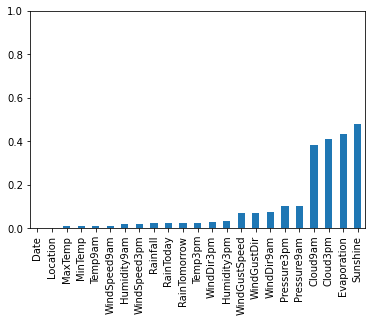

In [16]:
print('Presentación gráfica de los features con datos null :\n')
(data.isna().sum(axis=0)/data.shape[0]).sort_values().plot(kind = 'bar',ylim = (0,1))

Dias que lloverá : 
No     110316
Yes     31877
Name: RainTomorrow, dtype: int64


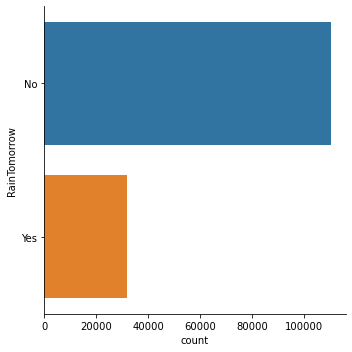

In [17]:
# Se analiza el balance de cada categoría
print(f'Dias que lloverá : \n{data.RainTomorrow.value_counts()}')
sns.catplot(y = 'RainTomorrow', kind = 'count', data = data)

Gráfica de correlación de datos


<AxesSubplot:>

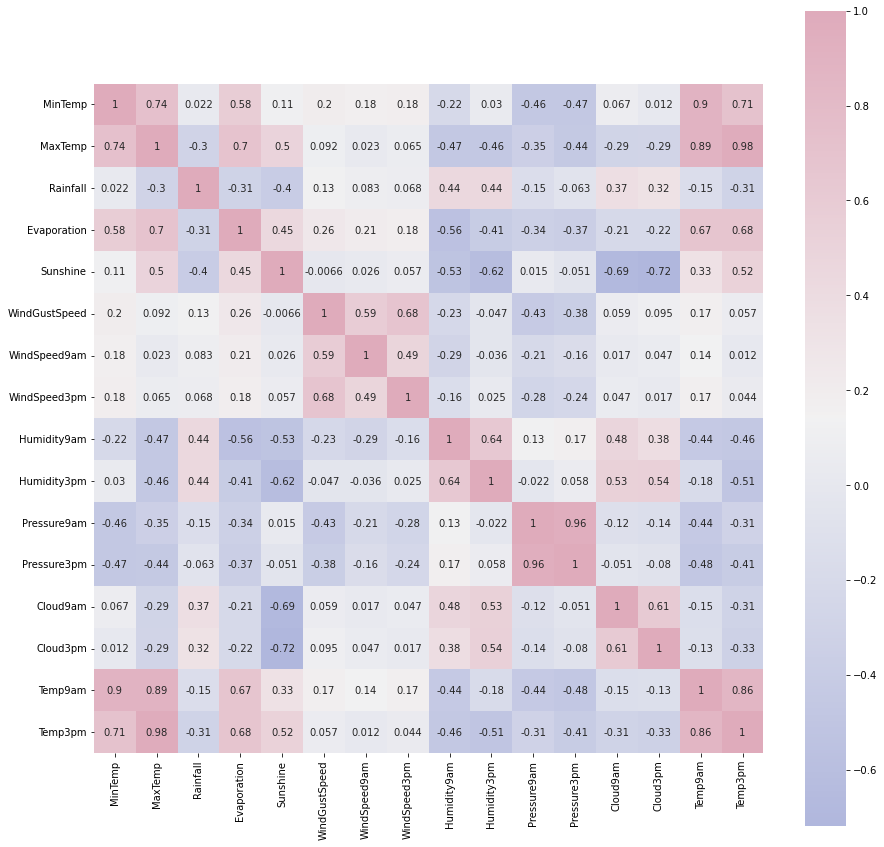

In [18]:
# Grafica las correlaciones 
print('Gráfica de correlación de datos')
#mat_corr = data.corr()
mat_corr = data.corr(method='spearman') # Se usa la correlación de Spearman
cmap = sns.diverging_palette(260,-10,s=50, l=75, n=6, as_cmap=True)
plt.subplots(figsize=(15, 15))
sns.heatmap(mat_corr,cmap= cmap,annot=True, square=True)

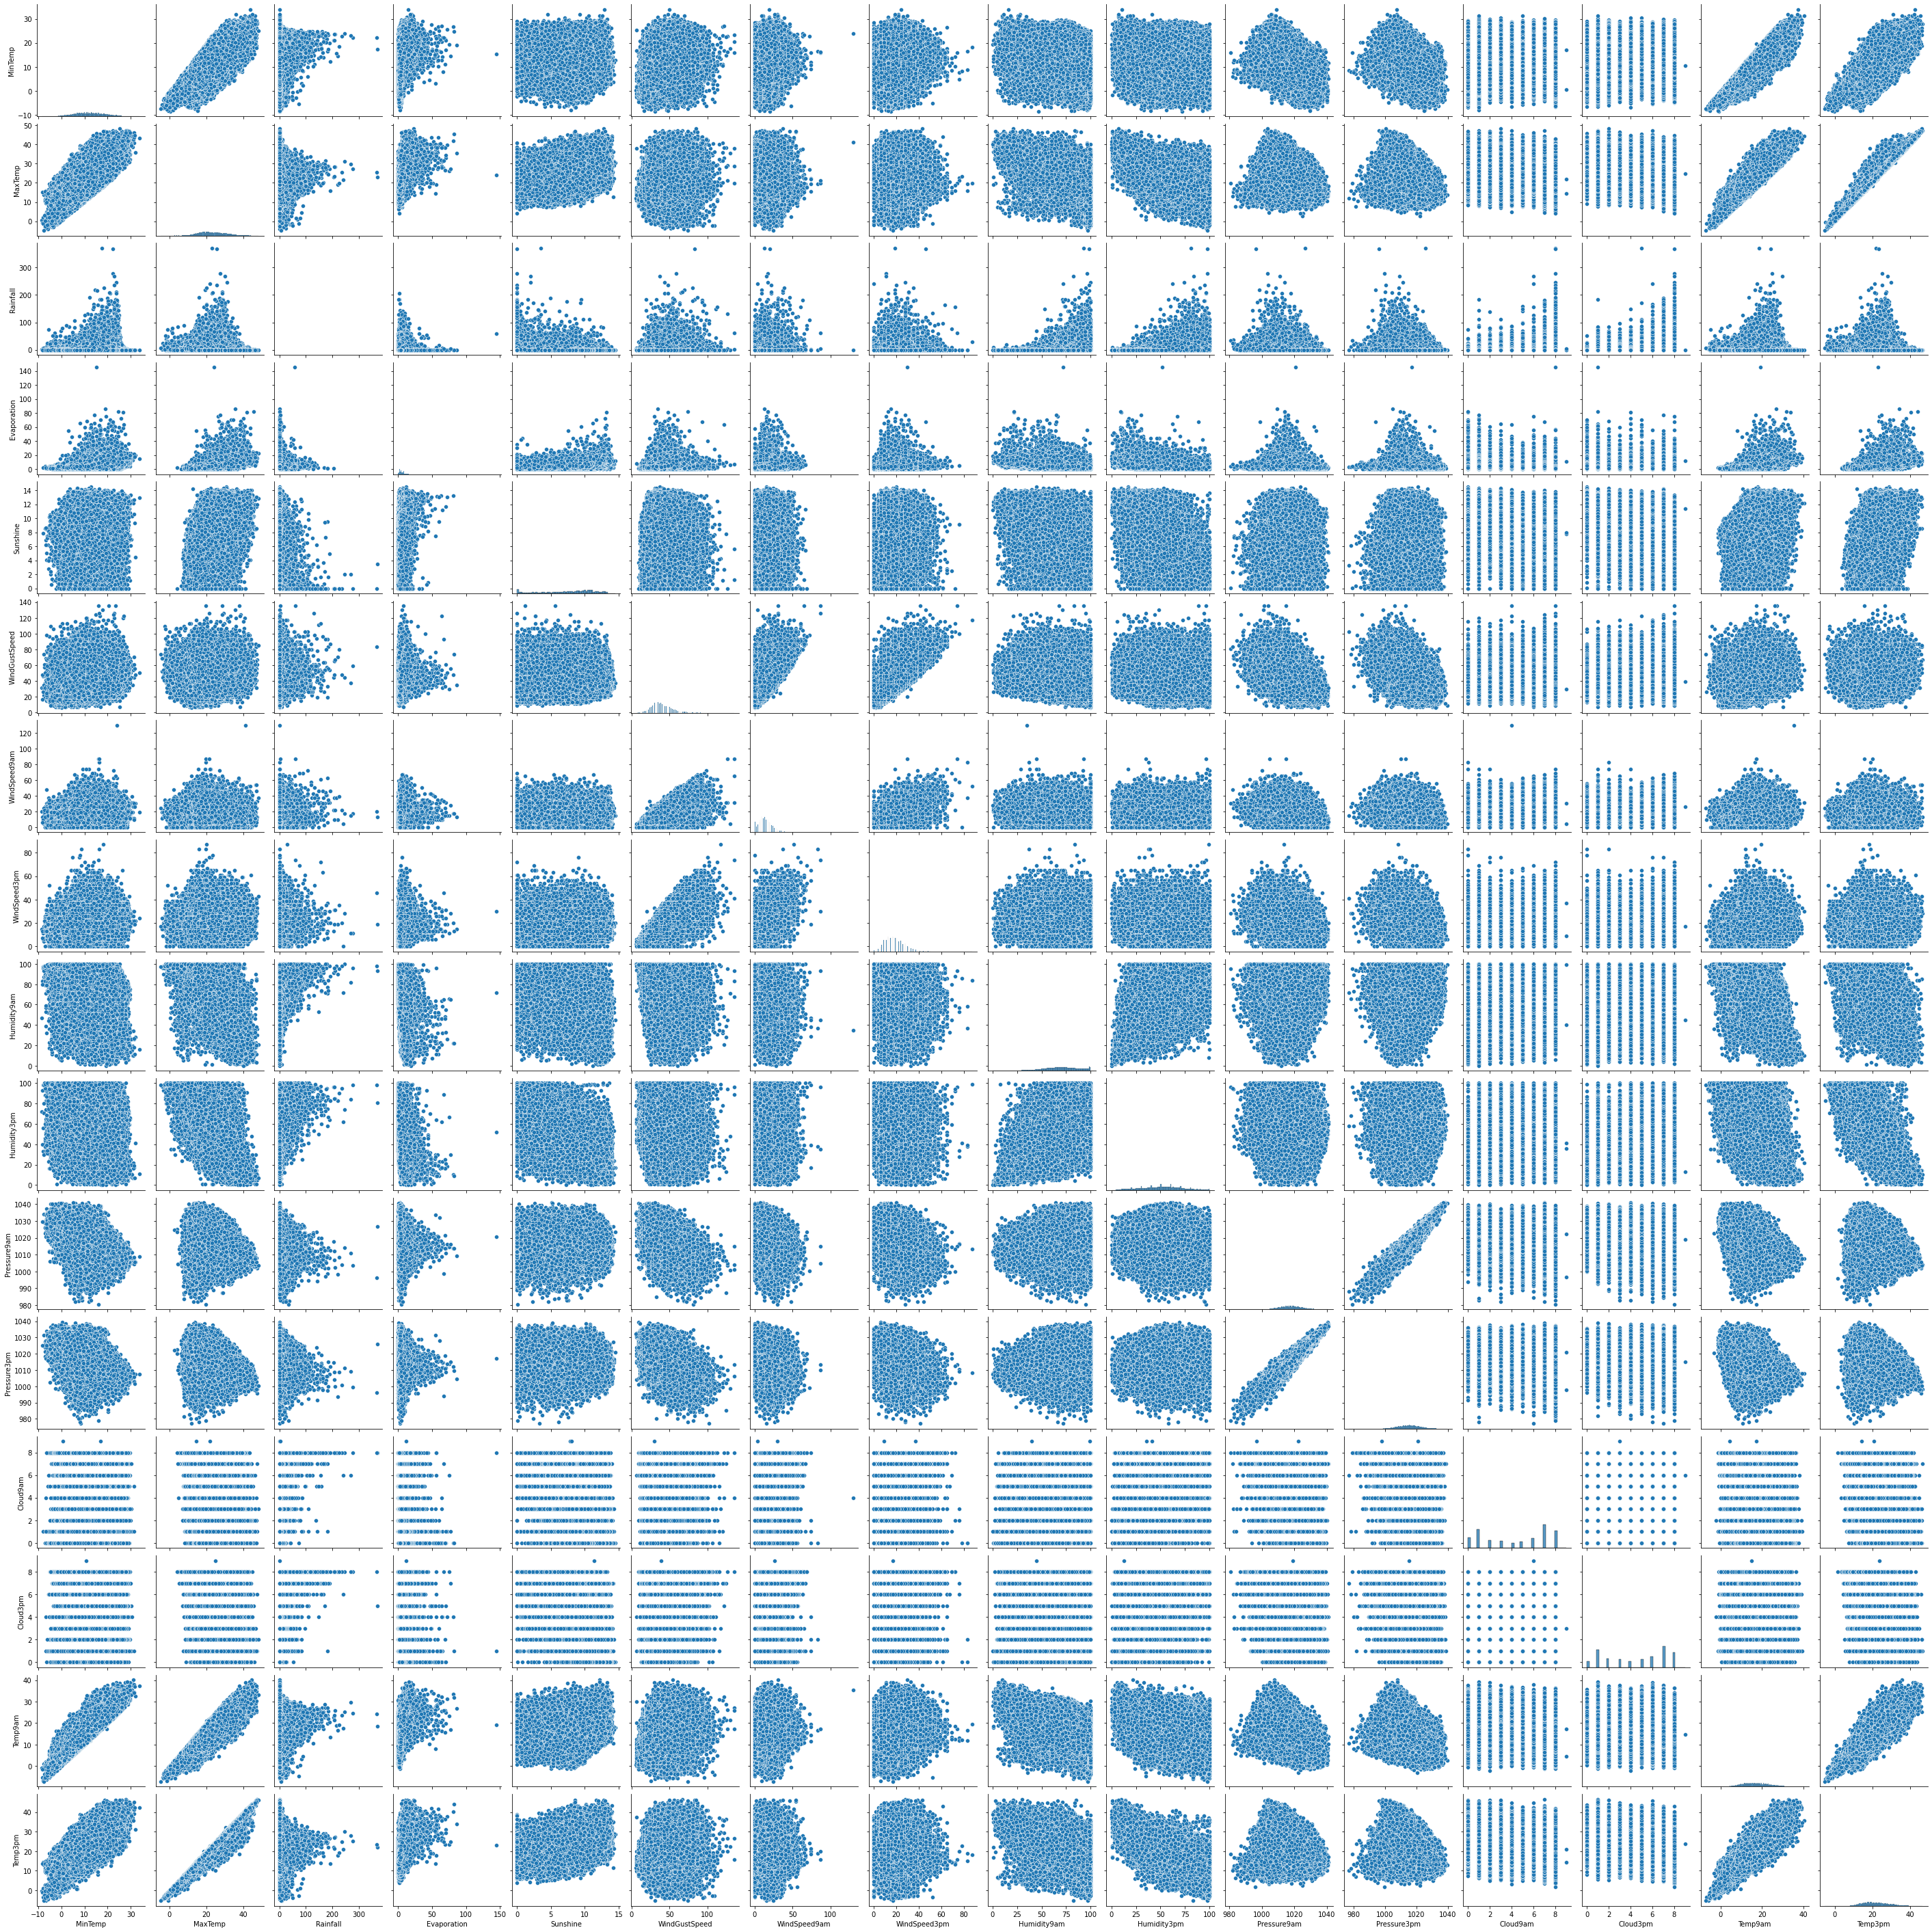

In [19]:
sns.pairplot(data)

In [20]:
# Superado por el código mas abajo prestado por Nahuel

# Presenta como histograma las features numéricas
#list_data_cat = list(data.select_dtypes(include = 'number').columns)
#fig = plt.figure(figsize=(20,20))
#ax = fig.gca() 
#data[list_data_cat].hist(ax = ax)

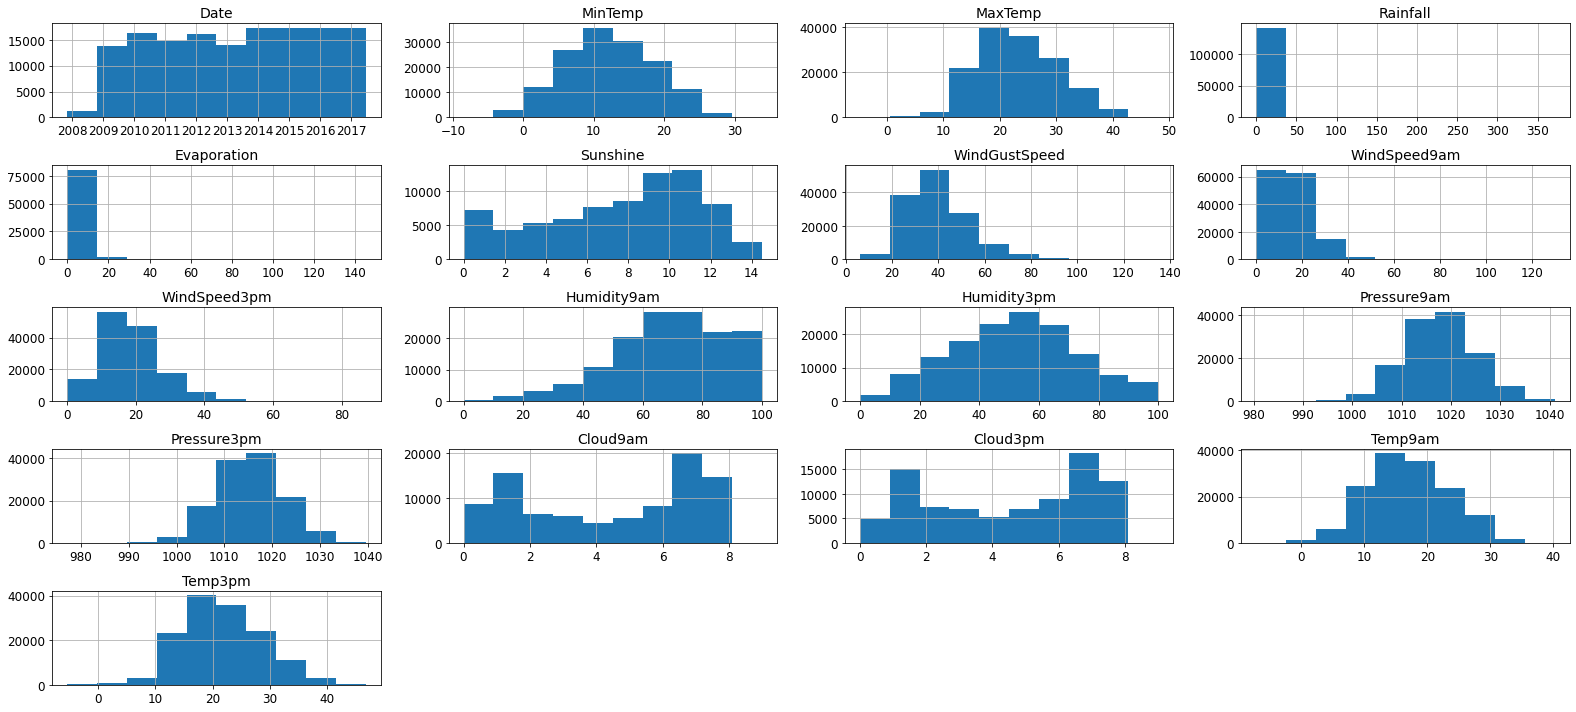

In [21]:
# Presenta como histograma las features numéricas

display_dataset_distributions(data)

In [22]:
# Calcula correlación entre variables categóricas de vientos

print(f'Correlación entre WindGustDir y WindDir9am : {data["WindGustDir"].corr(data["WindDir9am"], method="kendall")}')
print(f'Correlación entre WindGustDir y WindDir3pm : {data["WindGustDir"].corr(data["WindDir3pm"], method="kendall")}')
print(f'Correlación entre WindDir3pm y WindDir9am : {data["WindDir3pm"].corr(data["WindDir9am"], method="kendall")}')

Correlación entre WindGustDir y WindDir9am : 0.3113028363162443
Correlación entre WindGustDir y WindDir3pm : 0.4742141097459524
Correlación entre WindDir3pm y WindDir9am : 0.24166461838447578


In [54]:
# Muestra categorias y cantidad por variable categórica 

cat_cols = ['Location', 'WindGustDir','WindDir9am', 'WindDir3pm','Cloud3pm', 'Cloud9am', 'RainToday', 'RainTomorrow' ]

for col in cat_cols:
    print(f'{col}, número de categorías: {data[col].nunique()}')
    print(f'categorías: \n {data[col].unique()} \n')

m = len(data)
print(f'\nTotal de observaciones: {m}')



Location, número de categorías: 49
categorías: 
 ['Adelaide' 'Albany' 'Albury' 'AliceSprings' 'BadgerysCreek' 'Ballarat'
 'Bendigo' 'Brisbane' 'Cairns' 'Canberra' 'Cobar' 'CoffsHarbour'
 'Dartmoor' 'Darwin' 'GoldCoast' 'Hobart' 'Katherine' 'Launceston'
 'Melbourne' 'MelbourneAirport' 'Mildura' 'Moree' 'MountGambier'
 'MountGinini' 'Newcastle' 'Nhil' 'NorahHead' 'NorfolkIsland' 'Nuriootpa'
 'PearceRAAF' 'Penrith' 'Perth' 'PerthAirport' 'Portland' 'Richmond'
 'Sale' 'SalmonGums' 'Sydney' 'SydneyAirport' 'Townsville' 'Tuggeranong'
 'Uluru' 'WaggaWagga' 'Walpole' 'Watsonia' 'Williamtown' 'Witchcliffe'
 'Wollongong' 'Woomera'] 

WindGustDir, número de categorías: 16
categorías: 
 ['NW' 'SW' 'W' 'NNE' 'N' 'NNW' 'WSW' 'WNW' 'SSE' 'ENE' 'SSW' nan 'ESE'
 'SE' 'NE' 'E' 'S'] 

WindDir9am, número de categorías: 16
categorías: 
 ['SW' 'SSW' 'NNE' 'WNW' 'N' 'WSW' 'ENE' 'NE' 'W' 'S' nan 'ESE' 'NNW' 'SSE'
 'NW' 'E' 'SE'] 

WindDir3pm, número de categorías: 16
categorías: 
 ['W' 'SW' 'NE' 'NNW' 'WSW' '

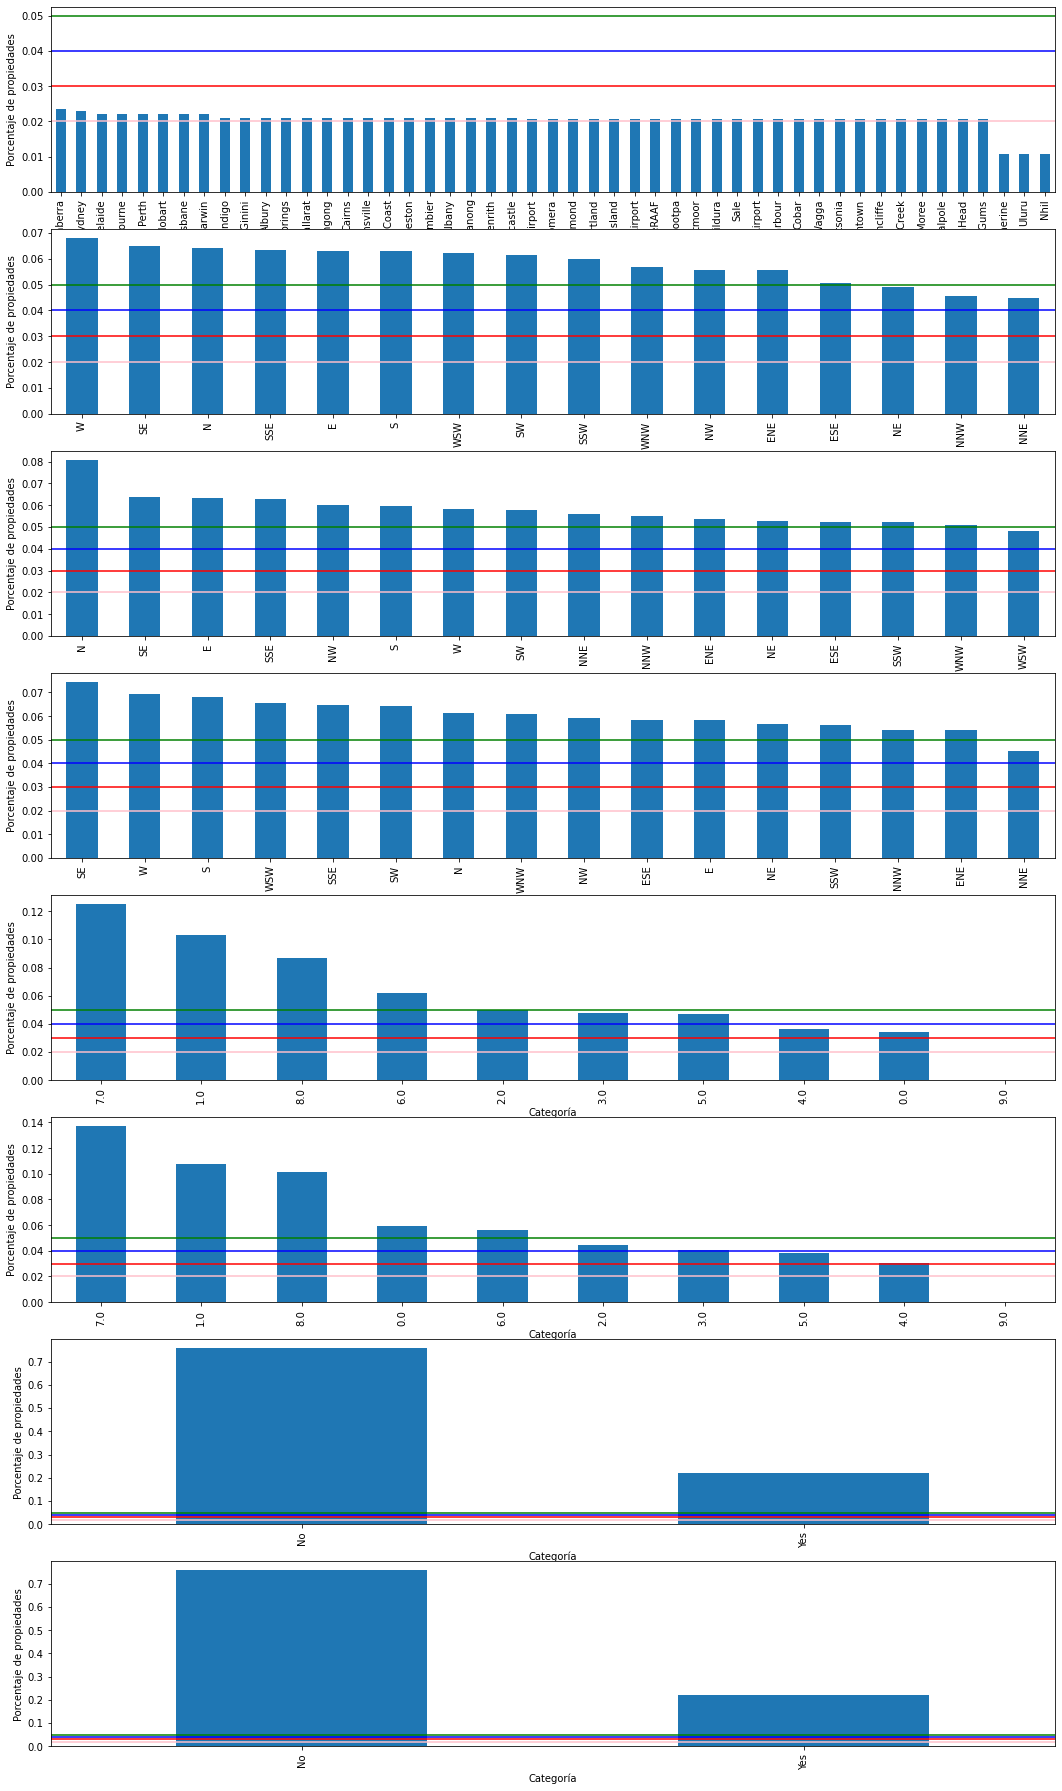

In [25]:
# Grafica cantidad de datos por categoría con marca a los 2, 3, 4, y 5%

fig,axes = plt.subplots(len(cat_cols),1,figsize=(18,len(cat_cols)*4))
for i,col in enumerate(cat_cols):
    temp_df = pd.Series(data[col].value_counts() / m)
    temp_df.sort_values(ascending=False).plot.bar(ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].axhline(y=0.02, color='pink') # 2%
    axes[i].axhline(y=0.03, color='red') # 3%
    axes[i].axhline(y=0.04, color='blue') # 4%
    axes[i].axhline(y=0.05, color='green') # 5%
    axes[i].set_ylabel('Porcentaje de propiedades')
    axes[i].set_xlabel('Categoría')
plt.show()

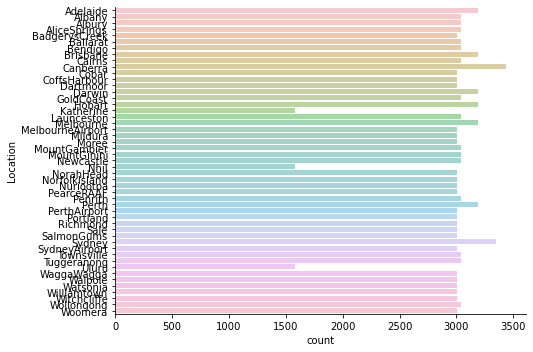

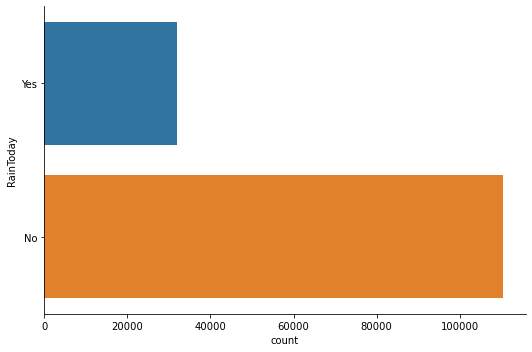

In [26]:
# Presenta como histograma las features categóricas
sns.catplot(y = 'Location', kind = 'count', data = data, aspect=1.5, alpha=0.5, legend_out= True)
sns.catplot(y = 'RainToday', kind = 'count', data = data, aspect=1.5)

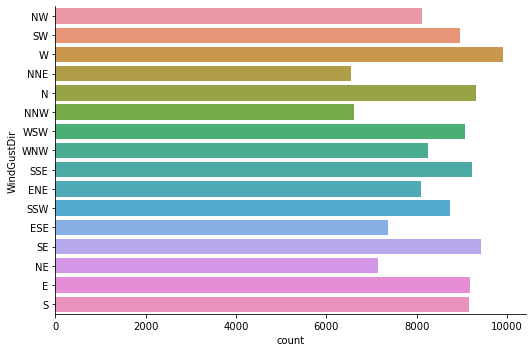

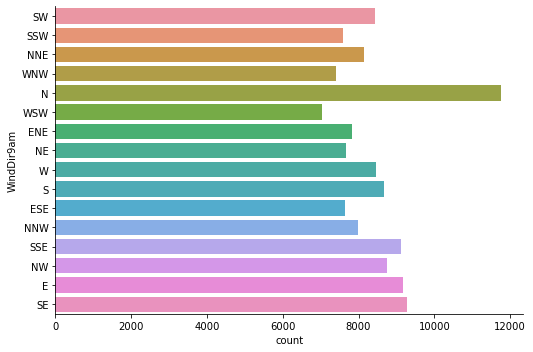

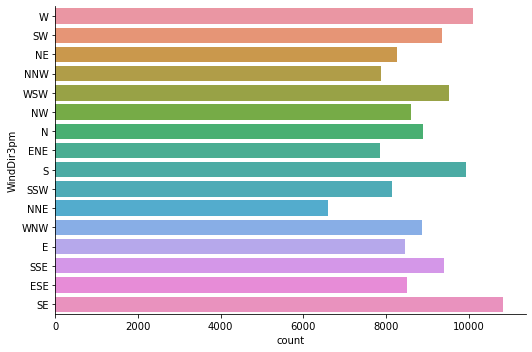

In [27]:
sns.catplot(y = 'WindGustDir', kind = 'count', data = data, aspect=1.5)
sns.catplot(y = 'WindDir9am', kind = 'count', data = data, aspect=1.5)
sns.catplot(y = 'WindDir3pm', kind = 'count', data = data, aspect=1.5)

In [28]:
data.groupby(['Location','RainToday']).size()

Location     RainToday
Adelaide     No           2402
             Yes           689
Albany       No           2114
             Yes           902
Albury       No           2394
                          ... 
Witchcliffe  Yes           879
Wollongong   No           2269
             Yes           713
Woomera      No           2789
             Yes           202
Length: 98, dtype: int64

In [29]:
limite_corr = 0.8
print(f'Features con correlación mayor a {limite_corr} :\n')

for x in range(len(mat_corr)):
    for y in range(x, len(mat_corr)):
        if (abs(mat_corr.iloc[x, y]) > limite_corr) and (x != y):
            #print(mat_corr.iloc[x, y])
            print(f'{mat_corr.index[x]} <--> {mat_corr.index[y]} : {round(mat_corr.iloc[x, y],3)}')

Features con correlación mayor a 0.8 :

MinTemp <--> Temp9am : 0.899
MaxTemp <--> Temp9am : 0.892
MaxTemp <--> Temp3pm : 0.984
Pressure9am <--> Pressure3pm : 0.96
Temp9am <--> Temp3pm : 0.865


In [30]:
print('El campo ""Cloud9am"" en numérico pero es una variable categórica con los siguientes valores y repeticiones :\n')
print(f'{data.Cloud9am.value_counts()}')

El campo ""Cloud9am"" en numérico pero es una variable categórica con los siguientes valores y repeticiones :

7.0    19972
1.0    15687
8.0    14697
0.0     8642
6.0     8171
2.0     6500
3.0     5914
5.0     5567
4.0     4420
9.0        2
Name: Cloud9am, dtype: int64


In [31]:
print('El campo ""Cloud3pm"" en numérico pero es una variable categórica con los siguientes valores y repeticiones :\n')
print(f'{data.Cloud3pm.value_counts()}')

El campo ""Cloud3pm"" en numérico pero es una variable categórica con los siguientes valores y repeticiones :

7.0    18229
1.0    14976
8.0    12660
6.0     8978
2.0     7226
3.0     6921
5.0     6815
4.0     5322
0.0     4974
9.0        1
Name: Cloud3pm, dtype: int64


3. Limpieza y preparación de datos / ingeniería de features \
Datos faltantes. \
Indicar cantidad de observaciones y valores faltantes para cada variable. \
¿Qué supuestos puede realizar acerca de los datos faltantes? \
¿Qué técnicas de imputación recomendaría? \
Ensayar distintas técnicas y analizar los resultados. \
En función del estudio inicial de las variables que se hizo en la sección anterior, elegir una 
técnica de codificación para cada variable. \
Cuando lo considere apropiado, ensayar distintas técnicas y comparar los resultados, teniendo en cuenta el tipo de clasificador a utilizar. \
Nota: para tipos de datos compuestos o estructurados, considerar la obtención de variables de tipo numérico/categórico. \
¿Qué puede decir acerca de las relaciones entre las variables de entrada? \
Antes de entrenar un modelo de aprendizaje automático, ¿Podría identificar las variables de 
entrada de mayor importancia? \
Considerar por lo menos dos técnicas para cada variable. Explique brevemente los métodos utilizados.


In [32]:
# Elimina los datos que tienen mas del 30% de datos null
#porcentaje_nulos = 0.3
#porcentaje_na = data.isna().sum(axis=0)/data.shape[0]
#drop_cols = porcentaje_na[porcentaje_na > porcentaje_nulos].index
#data.drop(columns=drop_cols,inplace=True)
#data.head()
#print(f'EL dataset tiene {data.shape[0]} filas y {data.shape[1]} columnas')

4. Entrenamiento de modelos (opcional)
Recurriendo a los modelos que conozca, defina una lista de modelos candidatos a entrenar 
(puede ser el mismo tipo de clasificador con distintos hiperparámetros). Nota: no se contemplará el 
desempeño del modelo elegido, sino las conclusiones que puedan establecerse a partir de la 
preparación previa de los datos.
Ensaye distintas cadenas de procesamiento con las técnicas consideradas en la sección 3 (por 
ejemplo, distintas técnicas de imputación, selección de variables de entrada, codificación de 
variables categóricas, transformación, etc.)

    4.1 Separación de datos
    Los pasos siguientes comprenden las etapas de preparación de datos y evaluación de resultados.
    Para ello, se debe particionar el dataset en entrenamiento y validación.

    4.2 Evaluación de resultados
    ¿Qué puede concluir acerca de los modelos y preparaciones de datos ensayadas? Tener en 
    cuenta como cada preparación afecta a los distintos modelos.

5. Presentación de resultados
Como presentación de este trabajo, deberán realizar una presentación para lo cual tendrán un 
bloque de tiempo de máximo 15 min por grupo. Durante la cursada también les recomendamos 
fuertemente presenten un informe de varianza muy cortito para poder guiarlos en el desarrollo

### ------------------------------------------------------------------------------------------------------------------------------------------------------
### Código Backup

In [33]:
# ** CUIDADO TARDA MUCHO EN CORRER **

# Verificar si el campo RainTomorrow con null puede ser sustituido por RainToday del día siguiente

#print('Se verifica si los campos nulos de RainTomorrow tienen un valor no nulo en el campo RainToday del día siguiente')
#lista = []
#for i in range(len(data)-1):
#    if data.RainTomorrow.isnull()[i]==True and data.RainToday.isnull()[i+1]==False:
#        lista.append(i)
#        print(f' {i} : {data.Location[i]} {data.Date[i]} R.Tomorrow == {data.RainTomorrow[i]}')
#        print(f' {i+1} : {data.Location[i+1]} {data.Date[i+1]} R.Today == {data.RainToday[i+1]}')

In [34]:
# ** CUIDADO TARDA MUCHO EN CORRER **
# Muestra los registros de la misma ciudad que tienen saltos en las fechas
#for i in range(len(data)-1):
#    x = data.Date[i+1]-data.Date[i]
#    if (x.days != 1 and (data.Location[i] == data.Location[i+1])):
#         print(f' {i} : {data.Location[i]} {data.Date[i]} -->> {data.Location[i+1]} {data.Date[i+1]}')

In [35]:
# ** CUIDADO TARDA MUCHO EN CORRER **

# Para los Rain Tomorrow que no son nulos verifica si el Rain Tomorrow coincide con el Rain Today de la próxima fila
#   Esto permite buscar inconsistencias entre el Rain Tomorroy y el Rain Today del día siguiente.

# **** No se encontraron inconsistencias.

#print('comparación de Rain Tomorrow vs. Rain Today de la fila siguiente :')
#for i in range(len(data)-1):
#    if data.RainTomorrow.isnull()[i] != True:
#        if data.RainTomorrow[i] != data.RainToday[i+1]:
#            print(f' {i} : {data.Location[i]} {data.Date[i]} R.Tomorrow == {data.RainTomorrow[i]}')
#            print(f' {i+1} : {data.Location[i+1]} {data.Date[i+1]} R.Today == {data.RainToday[i+1]}')
#            print('--------------------------------')

In [36]:
# ** CUIDADO TARDA MUCHO EN CORRER **

# Lista todos las filas mostrando la ciudad, la fecha, el Ran Tomorrow y el Ran Today

#for i in range(len(data)):
#    print(f' Indice : {i} Loc: {data.Location[i]} - Fecha: {data.Date[i]} Lluvia Ma: {data.RainTomorrow[i]} Lluvia hoy : {data.RainToday[i]}')

In [37]:
# ** CUIDADO TARDA MUCHO EN CORRER **

# Muestra todas las filas en donde la nubosidad a las 9 am y a las 3 pm son nulas

#cont = 0
#for i in range(len(data)-1):
#    if data.Cloud9am.isnull()[i] and data.Cloud3pm.isnull()[i]:
#        print(f' {i} : Date: {data.Date[i]}, Sunshine: {data.Sunshine[i]}, Evaporation : {data.Evaporation[i]}, RainToday: {data.RainToday[i]}')
#        cont += 1
#print(cont)

In [38]:
# ** CUIDADO TARDA MUCHO EN CORRER **

# Muestra todas las filas en donde la nubosidad a las 9 am y a las 3 pm y soleado y evaporación son nulas.

#cont = 0
#for i in range(len(data)-1):
#    if data.Cloud9am.isnull()[i] and data.Cloud3pm.isnull()[i] and data.Sunshine.isnull()[i] and data.Evaporation.isnull()[i]:
#        print(f' {i} : Date: {data.Date[i]}, Sunshine: {data.Sunshine[i]}, {data.Evaporation[i]}, RainToday: {data.RainToday[i]}')
#        cont += 1
#print(cont)

In [39]:
# ** CUIDADO TARDA MUCHO EN CORRER **

# Muestra todas las filas en donde la nubosidad a las 9 am y a las 3 pm son nulos o es nula el soleado o es nula 
#   la evaporación

#cont = 0
#for i in range(len(data)-1):
#    if (data.Cloud9am.isnull()[i] and data.Cloud3pm.isnull()[i]) or data.Sunshine.isnull()[i] or data.Evaporation.isnull()[i]:
#        print(f' {i} : {data.Location[i]} Date: {data.Date[i]}, Sunshine: {data.Sunshine[i]}, {data.Evaporation[i]}, RainToday: {data.RainToday[i]}')
#        cont += 1
#print(cont)